# Smith Chart Plotting

This notebook demonstrates the functionality of the `pysmithchart` library by generating a variety of Smith chart plots. Each section corresponds to a test scenario from the test suite. The plots are rendered inline so you can immediately see the results.

The examples include:

- An empty Smith chart with a custom major grid color
- A Smith chart with custom minor grid colors
- Plotting a single scalar (a single load impedance)
- Plotting a pair of points
- Plotting a VSWR circle with labeled points
- Visualizing an RLC frequency range
- Demonstrating a transformer circle transformation
- Plotting a stub design with SWR and constant resistance circles

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

from pysmithchart import S_PARAMETER

## 1. Empty Smith Chart

This example plots an empty Smith chart using a blue major grid.

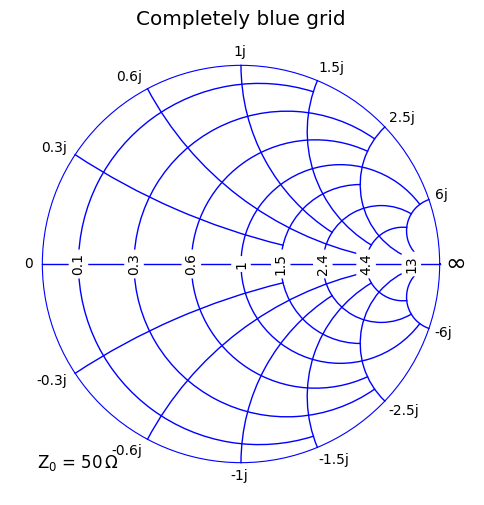

In [2]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith", grid_major_color="blue")
plt.title("Completely blue grid")
plt.show()

## 2. Minor Grid Colors

This example demonstrates a Smith chart with custom minor grid colors.

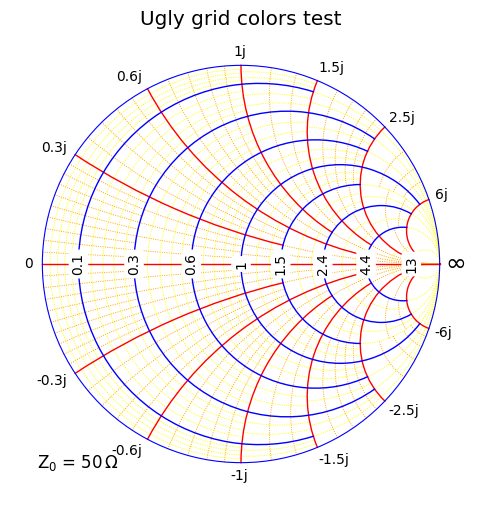

In [3]:
plt.figure(figsize=(6, 6))
params = {
    "grid_major_color_x": "blue",
    "grid_major_color_y": "red",
    "grid_minor_enable": True,
    "grid_minor_color_x": "yellow",
    "grid_minor_color_y": "orange",
}
plt.subplot(1, 1, 1, projection="smith", **params)
plt.title("Ugly grid colors test")
plt.show()

## 3. Plot Single Scalar Point

This example plots a single load impedance (75+50j) on the Smith chart.

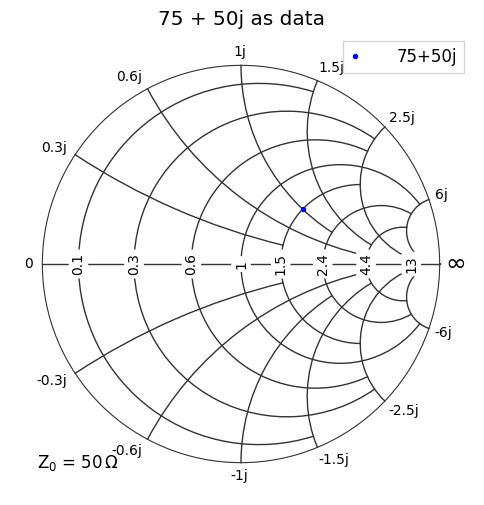

In [4]:
ZL = 75 + 50j
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith")
plt.plot(ZL, "b", linestyle=None, markersize=4, label="75+50j")
plt.title("75 + 50j as data")
plt.legend()
plt.show()

## 4. Plot Single Array (Two Points)

This example plots two points (75+50j and 150+100j) on the Smith chart.

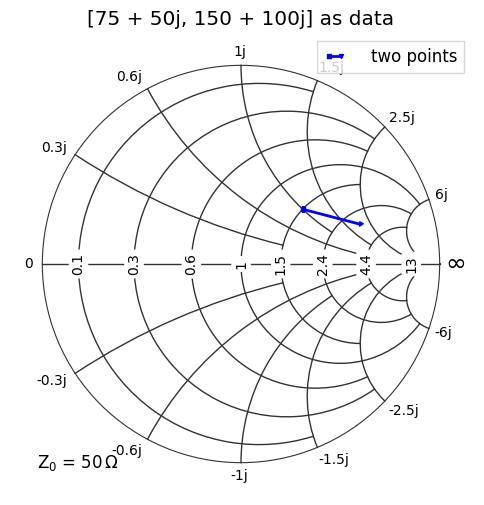

In [5]:
ZL = 75 + 50j
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith")
plt.plot([ZL, 2 * ZL], color="b", marker="o", markersize=4, label="two points")
plt.title("[75 + 50j, 150 + 100j] as data")
plt.legend()
plt.show()

## 5. VSWR Circle

This example plots a VSWR circle on the Smith chart and labels several points with their corresponding wavelength values.

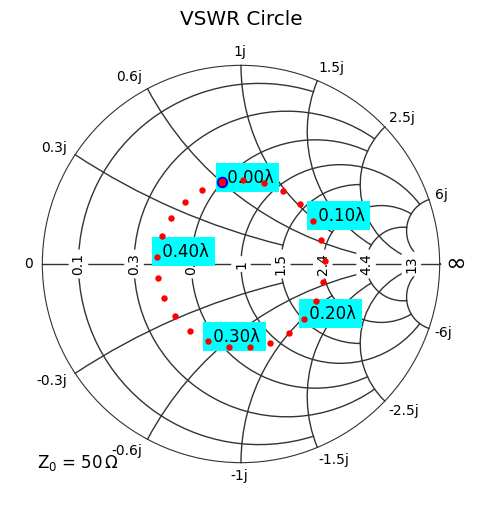

In [6]:
Z0 = 50
ZL = 30 + 30j
Gamma = (ZL - Z0) / (ZL + Z0)
lam = np.linspace(0, 0.5, 26)
theta = 2 * np.pi * lam
Gamma_d = Gamma * np.exp(-2j * theta)
z = (1 + Gamma_d) / (1 - Gamma_d)
Zd = z * Z0

plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith")
plt.plot(ZL, "b", marker="o", markersize=10)
plt.plot(Zd, "r", linestyle="", marker="o", markersize=5)

bdict = {"facecolor": "cyan", "edgecolor": "none"}
for i in [0, 5, 10, 15, 20]:
    plt.text(Zd[i].real / 50, Zd[i].imag / 50, " %.2fλ" % lam[i], bbox=bdict)

plt.title("VSWR Circle")
plt.show()

## 6. Frequency Range (RLC Series Load)

This example visualizes an RLC frequency range on the Smith chart for a series load (50Ω, 2pF, 20nH) over frequencies from 200 MHz to 2000 MHz.

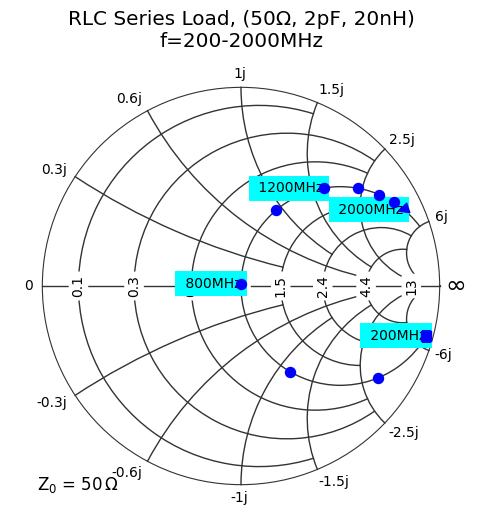

In [7]:
R = 50
L = 20e-9
C = 2e-12
f = np.linspace(2, 20, 10) * 100e6
omega = 2 * np.pi * f

ZL = R - 1j / (omega * C) + 1j * omega * L

bdict = {"facecolor": "cyan", "edgecolor": "none"}
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith")
plt.plot(ZL, "b", marker="o", markersize=10, linestyle="")
for i in [0, 3, 5, 9]:
    x = ZL[i].real / 50
    y = ZL[i].imag / 50
    s = " %.0fMHz" % (f[i] / 1e6)
    plt.text(x, y, s, ha="right", va="center", fontsize=10, bbox=bdict)
plt.title("RLC Series Load, (50Ω, 2pF, 20nH)\nf=200-2000MHz")
plt.show()

## 7. Transformer Circle

This example demonstrates a transformer circle where the load impedance is rotated by λ/8.

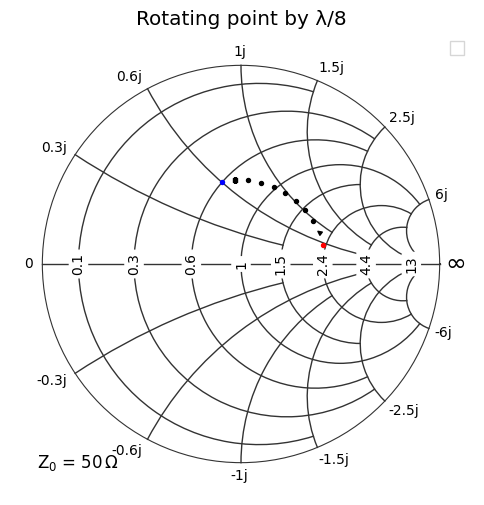

In [8]:
Z0 = 50
ZL = 30 + 30j
Gamma = (ZL - Z0) / (ZL + Z0)

angle = 2 * np.pi / 8
Gamma_prime = Gamma * np.exp(-2j * angle)
z = (1 + Gamma_prime) / (1 - Gamma_prime)
Zf = z * Z0

angle_arr = 2 * np.pi / 8 * np.linspace(0.1, 0.9, 9)
Gamma_prime = Gamma * np.exp(-2j * angle_arr)

plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith")
plt.plot(ZL, "b", marker="o", markersize=4)
plt.plot(Zf, "r", marker="o", markersize=4)
plt.plot(Gamma_prime, "k", ls="", datatype=S_PARAMETER, marker="o", markersize=4)
plt.title("Rotating point by λ/8")
plt.legend()
plt.show()

## 8. Stub Design

This example plots a stub design with SWR and constant resistance circles on the Smith chart.

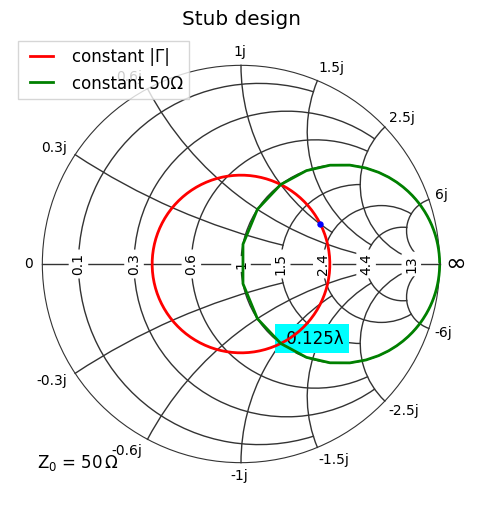

In [9]:
Z0 = 50
ZL = 100 + 50j

lam = np.linspace(0, 0.5, 101)
Gamma = (ZL - Z0) / (ZL + Z0)
Gamma_prime = Gamma * np.exp(-2j * 2 * np.pi * lam)
z = (1 + Gamma_prime) / (1 - Gamma_prime)
Zd = z * Z0

ZR = 50 + np.linspace(-1e4, 1e4, 1000) * 1j

bdict = {"facecolor": "cyan", "edgecolor": "none"}
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1, projection="smith")
plt.plot(Zd, "r", marker="", label="constant |Γ|")
plt.text(Zd[25].real / 50, Zd[25].imag / 50, " %.3fλ" % lam[25], bbox=bdict)
plt.plot(ZR, "g", marker=None, label="constant 50Ω")
plt.plot([ZL], "b", marker="o", markersize=5)
plt.title("Stub design")
plt.legend()
plt.show()